# Week 13 Group Activity

1. In markdown, describe KNN in your own words.

These aren't my *own* words, but Jamie Mortensen put it well when she said KNN is 'the peer-pressure variable'! KNN, or k-nearest neighbor, is a statistical tool that helps determine what group a particular piece of data belongs in by evaluating its 'nearest neighbor' data points.

2. Using the KNN example from class, write a function that finds the optimal value for k.
You should iterate over a range of values and return the k and the score when the
accuracy score is maximized. Be sure to only use odd values.


In [28]:
# Dependencies and modules:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import seaborn as sns
sns.set_theme(style="whitegrid")
import statistics
import math
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler



diabetes_path = "C:/Users/Nik/Documents/diabetes.csv"
diabetes_df = pd.read_csv(diabetes_path)
diabetes_df.head(5)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
# Creating function to loop thru K-NN
X = diabetes_df.drop('Outcome',axis=1)
y = diabetes_df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

k_value_list = []
knn_score_list = []

def k_test():
# create a range to check k values in. Rule of thumb is to check around the sqrt of the number of datapoints.
# for this data set, that is 29. So we will check in range(50)
    for k in range(50):
        # Set k to odd value so there will be no ties among neighbors:
        if k % 2 != 0:
            knn=KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_train, y_train)
            y_predict = knn.predict(X_test)
            score = knn.score(X_test,y_test)
            knn_score_list.append(score)
            k_value_list.append(k)
    else:
        pass

    k_vs_knn_df = pd.DataFrame(list(zip(k_value_list, knn_score_list)), columns =['k_value', 'Accuracy'])
    k_vs_knn_sorted = k_vs_knn_df.sort_values(['Accuracy', 'k_value'], ascending=[False,True], ignore_index=True)   
    
    fig, ax = plt.subplots()
    ax.scatter(k_vs_knn_sorted['k_value'], k_vs_knn_sorted['Accuracy'], c=k_vs_knn_sorted['Accuracy'],cmap="cool", marker='o')
    ax.set_ylabel("Accuracy as calculated by knn.score")
    ax.set_xlabel("Value of K")
    ax.set_title('Accuracy of Prediction for Different Values of K')
    plt.annotate(" <-Best k", (15, 0.78))
    plt.show()
    
    return k_vs_knn_sorted.loc[0]

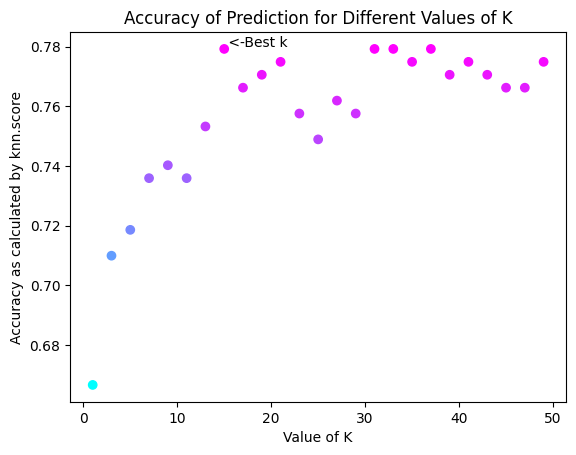

k_value     15.000000
Accuracy     0.779221
Name: 0, dtype: float64

In [34]:
k_test()

3. How did the panel influence your thoughts about working in tech, specifically work in the
data realm? Discuss with your group and summarize your thoughts in under 250 words

I found it particularly relieving to learn that these pioneers of tech field still wrestle with imposter syndrome. Their message that confidence in your team and confidence that your employer and your team know your strengths and weaknesses, your capabilities and your skill gaps -because you are always honest with them- is reassuring and seems like great advice.

My interest was piqued by the kind of work that was mentioned. I like the idea of being a consultant like Angelique and finding new challenges with every project. I was in awe of Jeromey's story about informing the national spending with his Federal Reserve project and the sense of civic pride he felt. 

I was comforted to discover that Susan and Michelle's work and experiences sounded very appealing to me, too, and that tells me I have a broad landing zone for finding a place in a tech role to use my new skills! 

Of course, the most meaningful guest -to me- was Brittany. She has so recently walked in my shoes, she has pivoted as I hope to pivot, and she is still fresh enough to sympathize with the concerns that I have as a new data science student that I hung on her every word and was very encouraged by what she had to say and paid special attention to her advice.

Thank you very much, Alexis, for organizing the panel.

Misc. Notes:

* parsimony is instersection of accuracy and simplicity
* be cheap with your compute
* Rule of thumb: k is = to sqrt of n samples (for our dataset, this is around 28)
* An odd number for k is to keep a tie from happening.
* smaller k leads to underfitting, larger k leads to overfitting
* what you want is the first most accurate k value. lowest most accurate.
* nest a function that compares k values and prints 
